In [1]:
import matplotlib
from matplotlib_venn import venn3
from matplotlib import pyplot as plt
import statistics

In [18]:
# input files
afile = '../../../her7/02_functional_annotations/Ceratopteris_KEGG_annotations_by_phylogeny.txt'
bfile = '../../../her7/02_functional_annotations/eggnog_annotations.txt'
cfile = '../../../her7/02_functional_annotations/kegg_annotations.txt'
dfile = '../../../her7/02_functional_annotations/hormone_manual_kegg_annotations.txt'

kofamthres = 1

In [31]:
fi = open(afile)

aset = set()

for line in fi:
    gene, ko = line.rstrip().split('\t')
    #print(gene,ko)
    pair = (gene,ko)    
    aset.add(pair)

fi.close()

In [32]:
len(aset)

8223

In [34]:
fi = open(bfile)

bset = set()

for line in fi:
    if line[0] == '#':
        continue
        
    col = line.rstrip().split('\t')
    gene = 'Ceric.' + col[0].split('.')[1]
    if col[11] == '-':
        continue
    kolist = col[11].split(',')
    for ko in kolist:
        ko = ko.split(':')[1]
        #print(gene,ko)
        
        pair = (gene,ko)    
        bset.add(pair)

fi.close()

In [35]:
len(bset)

15055

In [36]:
fi = open(cfile)

cset = set()

for line in fi:
    if line[0] == '#':
        continue
        
    col = line.rstrip().split('\t')
    gene = 'Ceric.' + col[1].split('.')[1]
    ko = col[2]
    
    if col[4] == '' or col[3] == '':
        continue
    score = float(col[4]) / float(col[3])
    #print(gene,ko)
    
    if score > kofamthres:
        #print(gene,ko,score)
    
        pair = (gene,ko)    
        cset.add(pair)

fi.close()

In [37]:
len(cset)

10429

# Calculate agreement between phylogeny based annotations and eggnog and kofamscan



### Plot overlap

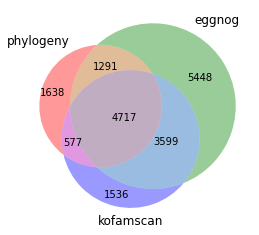

In [41]:
venn3([aset, bset, cset], ('phylogeny', 'eggnog', 'kofamscan'))
#matplotlib.pyplot.savefig('figures/annotation_support_venn_diagram.pdf')

plt.show()